# Imports

In [51]:
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Loading the dataset

In [52]:
dataset = pd.read_csv('dataset.csv')

# Exploratory Data Analysis

### Displaying the first 5 rows 

In [53]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Displaying the last 5 rows

In [54]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Information related to dataset attributes

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Checking teh number of rows and columns of teh dataset

In [56]:
dataset.shape

(891, 12)

### Checking the datatypes of dataset

In [57]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Exploring the categorical features by counting the unique values of each feature

In [58]:
dataset.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Checking the missing values in the dataset and determining  the percentage of missing values for each feature.

In [59]:
print("Null values in each feature:\n\n", dataset.isnull().sum())

Null values in each feature:

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Calculating the range, mean, median and mode of the attributes

In [60]:
cols = ["Age", "Fare", "SibSp", "Parch"]
mean_values = []
mode_values = []
median_values = []
range_values = []
for col in cols:
    mean_values.append(dataset[col].mean())
    mode_values.append(dataset[col].mode()[0])
    median_values.append(dataset[col].median())
    range_values.append((dataset[col].min(), dataset[col].max()))

In [61]:
b = PrettyTable()
b.add_column("Measure", ["Mean", "Mode", "Median", "Range"])
b.add_column("Age", [mean_values[0], mode_values[0], median_values[0], range_values[0]])
b.add_column("Fare", [mean_values[1], mode_values[1], median_values[1], range_values[1]])
b.add_column("SibSp", [mean_values[2], mode_values[2], median_values[2], range_values[2]])
b.add_column("Parch", [mean_values[3], mode_values[3], median_values[3], range_values[3]])
print(b)

+---------+-------------------+--------------------+--------------------+---------------------+
| Measure |        Age        |        Fare        |       SibSp        |        Parch        |
+---------+-------------------+--------------------+--------------------+---------------------+
|   Mean  | 29.69911764705882 | 32.204207968574636 | 0.5230078563411896 | 0.38159371492704824 |
|   Mode  |        24.0       |        8.05        |         0          |          0          |
|  Median |        28.0       |      14.4542       |        0.0         |         0.0         |
|  Range  |    (0.42, 80.0)   |  (0.0, 512.3292)   |       (0, 8)       |        (0, 6)       |
+---------+-------------------+--------------------+--------------------+---------------------+


# Using two statistical metrics, calculate values for your attributes

In [62]:
dataset.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Correlation is used to determine the strength of relationship between different attributes. The values returned by corr() lies between the range of (-1, 1). -1 shows the perfect negative or inverse relation between two variables and vice versa. 0 value shows that there is no relation between the two variables. In our dataset correlation statistical measure telling us that <b>Fare</b> attribute has a strong inverse correlation with <b>Pclass</b> attribute meaning that the passengers who belong to higher class paid the higher fare.  

In [63]:
dataset.quantile([0.25, 0.5, 0.75], axis=0, numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0.25,223.5,0.0,2.0,20.125,0.0,0.0,7.9104
0.50,446.0,0.0,3.0,28.000,0.0,0.0,14.4542
0.75,668.5,1.0,3.0,38.000,1.0,0.0,31.0000


# Visualization

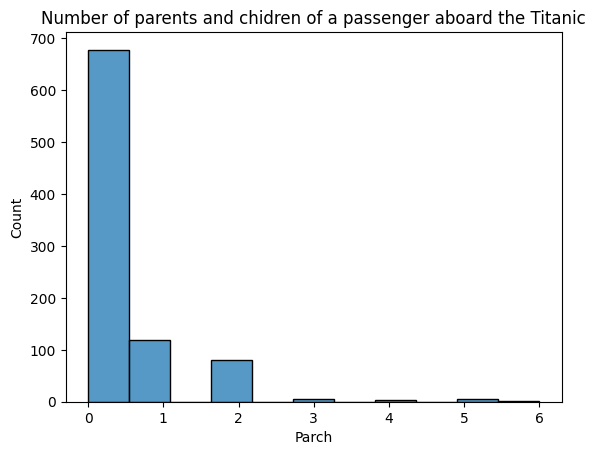

In [64]:
sns.histplot(dataset['Parch'])
plt.title('Number of parents and chidren of a passenger aboard the Titanic')
plt.show()

The above histogram block shows that almost 650 passengers in our dataset didn't have any parent or children on board. Almost 110 and 90 passengers had only 1 and 2 parent or children with them respectively. Remaining passengers had more than 2 parents or children with them aboard. 

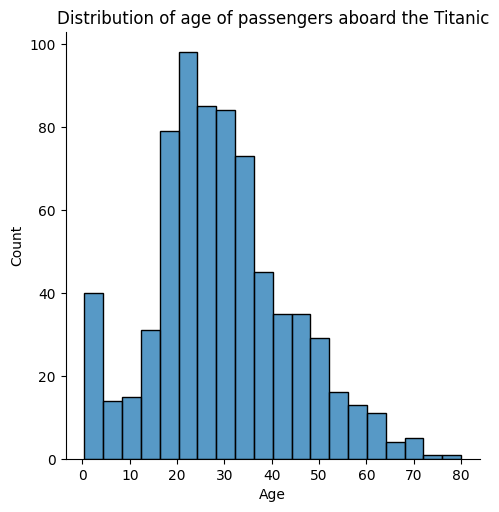

In [65]:
sns.displot(dataset['Age'])
plt.title('Distribution of age of passengers aboard the Titanic')
plt.show()

This distribution graph shows the age distribution of the passengers who were travelling on Titanic. Higher spikes between 20 to 40 shows that most of the passengers on Titanic were 20 to 40 years old.

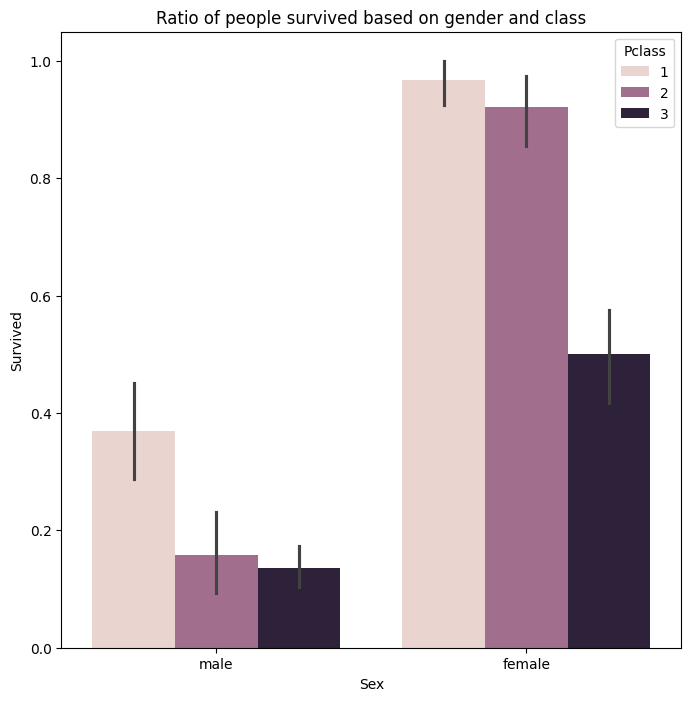

In [66]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=dataset)
plt.title("Ratio of people survived based on gender and class")
plt.show()

This graph shows that how many males and females survived of each class. This shows that females of each class were survived as compared to males. And most of the male and female passengers of Pclass 1 were survived.

Text(0.5, 1.0, 'Age distribution of people survived')

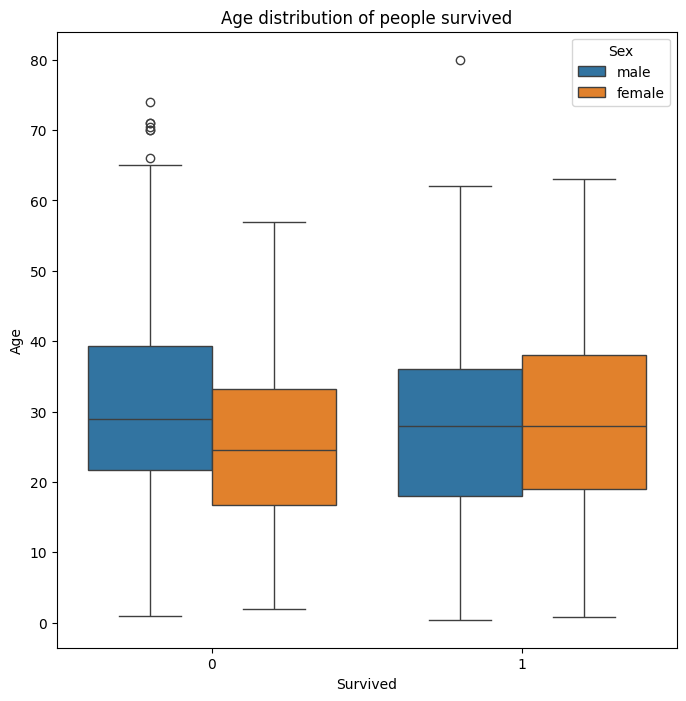

In [67]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Survived", y="Age", hue="Sex", data=dataset)
plt.title("Age distribution of people survived")

This graph is showing the ages of males and females who were survived and not survived. This graph is also showing the outliers in the age column. The blue boxes shows the distribution of ages of males and orange boxes shows the range of ages of females. The dots are showing the outliers which is showing that there are some passengers in our dataset who were 70-80 years old.

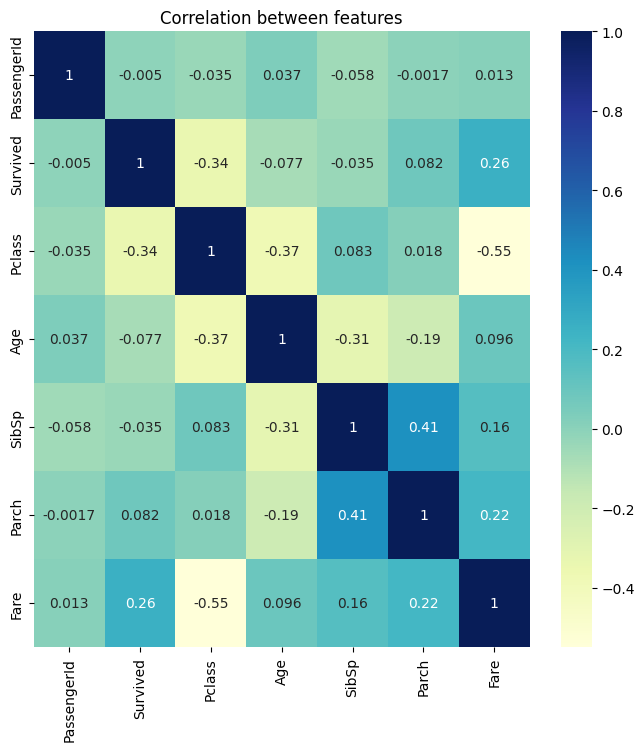

In [68]:
numerical_features = dataset.select_dtypes(include=np.number)
plt.figure(figsize=(8,8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation between features")
plt.show()

Heatmap graph is showing that how much stronger the relationship of one attribute with other attributes. The more the values is the stronger the relation it shows. Positive and negative signs are just showing the direction of relationship. In the heatmap of our dataset it is showing that SibSp and Parch columns have the strongest relationship with each other and age also have enough stronger relationship with Pclass and SibSp attribute but inversey.

We can see in EDA above that we have 20% values are missing in the age column and almost 80% values are missing from the Cabin column. As missing values in the Cabin column are very large so it is good to drop that column and few values are missing values from Age column so we can impute the values in that column using the data from other columns in order to get the better accuracy of the model.

In [69]:
dataset = dataset.drop(["Cabin"], axis=1)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


C:\Users\mirza\AppData\Local\Temp\ipykernel_21568\536309420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Pclass', y = 'Age', data = dataset, palette= 'GnBu_d').set_title('Age by Passenger Class')


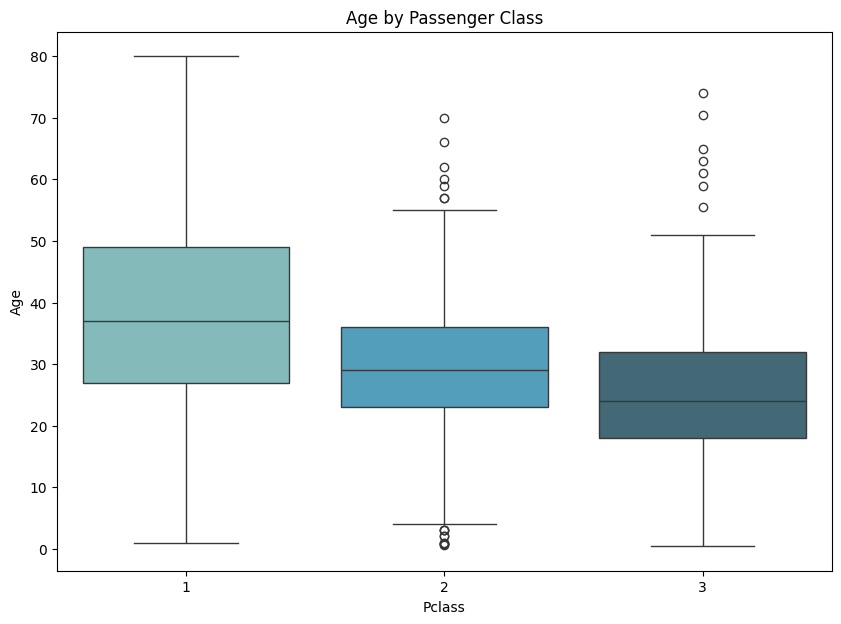

In [70]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = dataset, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

If we plot the ages with respect to the Passenger's Class we can see in the graph above that the average age of passengers in Pclass 1 is 37, for Pclass 2 it's 29 and for Pclass 3 it's 24. So using this insight we can now create a function which will impute the average age of the pasengers which are missing accordinng to their Pclass.

In [71]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [72]:
dataset['Age'] = dataset[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\mirza\AppData\Local\Temp\ipykernel_21568\2814349933.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\mirza\AppData\Local\Temp\ipykernel_21568\2814349933.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [73]:
dataset.dropna(inplace=True)

In [74]:
dataset.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [75]:
cols = ['Sex', 'Embarked']
for col in cols:
    dataset[col] = dataset[col].astype('category')

In [76]:
le = LabelEncoder()
dataset['Sex_encoded'] = le.fit_transform(dataset['Sex'])
dataset['Embarked_encoded'] = le.fit_transform(dataset['Embarked'])

In [77]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Embarked_encoded
0,0,3,male,22.0,1,0,7.2500,S,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,2
3,1,1,female,35.0,1,0,53.1000,S,0,2
4,0,3,male,35.0,0,0,8.0500,S,1,2


In [78]:
dataset.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [79]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [80]:
x = dataset.drop(['Survived'], axis=1)
y = dataset['Survived']

In [81]:
print(dataset['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64


### Evaluation Measures

In [82]:
def evaluation(ytest, pred):
    accuracy = accuracy_score(ytest, pred)
    precision = precision_score(ytest, pred)
    recall = recall_score(ytest, pred)
    f1score = f1_score(ytest, pred)
    precision = "{:.1%}".format(precision) 
    b= PrettyTable() 
    b.field_names = ["Accuracy", "Precision", "Recall", "F1 score"]
    b.add_row([round(accuracy,3), precision ,round(recall,3),round(f1score,3)])
    print("\n\nEvaluation Scores:")
    print("==================\n")
    print(b)


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [84]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

d:\UNI\MACS\Term 1\Big Data\Project\Titanic-Dataset-EDA-and-Visualization\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
predictions = lr.predict(x_test)

In [86]:
evaluation(y_test, predictions)



Evaluation Scores:

+----------+-----------+--------+----------+
| Accuracy | Precision | Recall | F1 score |
+----------+-----------+--------+----------+
|  0.828   |   84.5%   | 0.683  |  0.755   |
+----------+-----------+--------+----------+


In [87]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [88]:
predictions = svm.predict(x_test)
evaluation(y_test, predictions)



Evaluation Scores:

+----------+-----------+--------+----------+
| Accuracy | Precision | Recall | F1 score |
+----------+-----------+--------+----------+
|  0.659   |   62.7%   | 0.308  |  0.413   |
+----------+-----------+--------+----------+
